# Chapter 7: Loading Freight Rates

If your model contains lots of locations and has transfer betweeen these location, it could become time-consuming to create and maintain all data aligned with them. The following sections descibe the 'manual' (variant 1) and the 'semi-automatic' way (variant 2).

## Variant 1: create and register Location and Freight Rates

In variant 1 (refering to the examples Ditribution Network) four locations and the freight between them.

In [1]:
globals().clear(); import aitpath; import importlib,sunflow; importlib.reload(sunflow)
from sunflow import SupplyNet,Logistics,Customer,Location,Freight,Producer,SunFlow
#
# init
#
sun = SunFlow()
#
# create locations
#
Europe      = Location('Europe')         # the Winery
New_York    = Location('New York')       # warehouse
New_Orleans = Location('New Orleans')    # warehouse
StLouis     = Location('StLouis')        # customer
#
# register freight rates
#
Freight(Europe,       New_York,      125 )
Freight(Europe,       New_Orleans,   145 )
Freight(New_York,     StLouis,        60 )
Freight(New_Orleans,  StLouis,        41 )
#
# display all creates entities
#
sun.show()
print()

SunFlow
Entities
  [  0] Location    Europe
  [  1] Location    New York
  [  2] Location    New Orleans
  [  3] Location    StLouis
  [  4] Freight     Europe => New York
  [  5] Freight     Europe => New Orleans
  [  6] Freight     New York => StLouis
  [  7] Freight     New Orleans => StLouis



The retrieved locations below can now used further in our model.

All participants like suppliers, warehouses/distribution hubs and customers are defined below.

## Variant 2: create and register Location and Freight rates by loading from File

Variant 2 does a different approach. Instead of creating all registrations manual, it uses an Excel file with the locations and their transfer rates. For this example we use the file WineryFreights.xlsx which is shown below.


<div>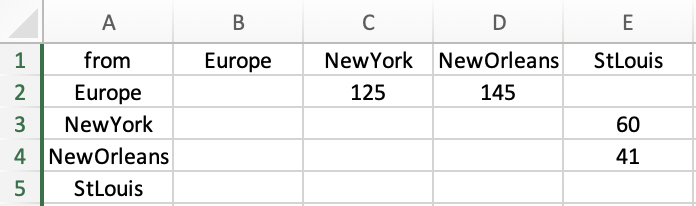</div>

The table above contains N+1 columns, where N is the number of locations, which has to be in the first line and the first column. And, 

- it must (!!!) be symmetric, i.e. the locations in the first column must be the same as in the first line and 
- the name of the first column (cell A1) have to be 'from'.

Cells containing a freight rate will be used to register its freight as you can see below. If no freight given or freight rate = 0, than SunFlow uses a freight=0 as rate.

In [2]:
globals().clear(); import aitpath; import importlib,sunflow; importlib.reload(sunflow)
from sunflow import SupplyNet,Logistics,Customer,Location,Freight,Producer, SunFlow
#
# init
#
sun = SunFlow()
#
# load freight from file WineryFreights.xlsx (see above)
#
# !!!!
# Adapt this path to your path
# !!!!
sun.dataDir('py/pydata/datasets/')
sun.loadFreights('WineryFreights.xlsx')
#
# reference by loadFreights() created locations
#
Europe      = sun.location('Europe')         # the Winery
New_York    = sun.location('New York')       # warehouse
New_Orleans = sun.location('New Orleans')    # warehouse
StLouis     = sun.location('StLouis')        # customer
#
# display all creates entities
#
sun.show()
print()

SunFlow
Entities
  [  0] Location    Europe
  [  1] Location    NewYork
  [  2] Location    NewOrleans
  [  3] Location    StLouis
  [  4] Freight     Europe => NewYork
  [  5] Freight     Europe => NewOrleans
  [  6] Freight     NewYork => StLouis
  [  7] Freight     NewOrleans => StLouis



Instead of creating the locations by

    Europe = Location( 'Europe' )

your reference the already created locations by

    Europe = sun.location('Europe')

if you want to use them within your model. 